In [175]:
import random
import os
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [176]:
CLASSES = ["Defective", "Non-Defective"]

In [177]:
data_dir = Path("../data/Pepsico RnD Potato Lab Dataset")
binarized_data_dir = Path("../data/Binarized")
noisy_data_dir = Path("../data/Noisy")

train_subdir = Path("Train")
test_subdir = Path("Test")

In [178]:
def display_image(image_path):
    plt.figure()
    image = plt.imread(image_path)
    plt.imshow(image)
    
    return

In [179]:
train_filepaths_defective = [data_dir / train_subdir / CLASSES[0] / file for file in os.listdir(data_dir / train_subdir / CLASSES[0])]
train_filepaths_nondefective = [data_dir / train_subdir / CLASSES[1] / file for file in os.listdir(data_dir / train_subdir / CLASSES[1])]
test_filepaths_defective = [data_dir / test_subdir / CLASSES[0] / file for file in os.listdir(data_dir / test_subdir / CLASSES[0])]
test_filepaths_nondefective = [data_dir / test_subdir / CLASSES[1] / file for file in os.listdir(data_dir / test_subdir / CLASSES[1])]

In [180]:
image = plt.imread(train_filepaths_nondefective[0])

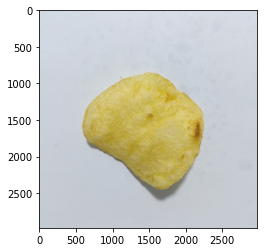

In [181]:
plt.imshow(image)

In [182]:
def preprocess(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    thresholded_image = cv2.inRange(image_hsv, (0, 0, 0, 0), (180, 255, 30, 0))
    dilated_image = cv2.dilate(thresholded_image, np.ones((5, 5), 'uint8'), iterations=30)

    return dilated_image

In [183]:
preprocessed_image = preprocess(image)

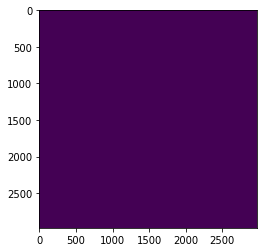

In [184]:
plt.imshow(preprocessed_image)

In [185]:
for file_path in train_filepaths_defective:
    image = plt.imread(file_path)
    preprocessed_image = preprocess(image)
    file_name = str(file_path).split("/")[-1]
    plt.imsave(binarized_data_dir / train_subdir / CLASSES[0] /file_name, preprocessed_image)

In [186]:
for file_path in train_filepaths_nondefective:
    image = plt.imread(file_path)
    preprocessed_image = preprocess(image)
    file_name = str(file_path).split("/")[-1]
    plt.imsave(binarized_data_dir / train_subdir / CLASSES[1] /file_name, preprocessed_image)

In [187]:
for file_path in test_filepaths_defective:
    image = plt.imread(file_path)
    binarized_image = preprocess(image)
    file_name = str(file_path).split("/")[-1]
    plt.imsave(binarized_data_dir / test_subdir / CLASSES[0] /file_name, binarized_image)

In [188]:
for file_path in test_filepaths_nondefective:
    image = plt.imread(file_path)
    binarized_image = preprocess(image)
    file_name = str(file_path).split("/")[-1]
    plt.imsave(binarized_data_dir / test_subdir / CLASSES[1] /file_name, binarized_image)